In [1]:
import os
os.chdir("..")
print(os.getcwd())

import warnings
warnings.filterwarnings("ignore")

D:\mipt\internship\InternshipTestTask\human_segmentation


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch
from torch import nn
from torch import optim
from torch import autograd as ag
import pydensecrf.densecrf as dcrf

from torch.utils.data import DataLoader, Dataset

import segmentation_models_pytorch as smp

%matplotlib inline

In [3]:
from lib.data import Dataset
from lib.models import *

In [4]:
# paths to data
TRAIN = os.path.join("data", "train")
TRAIN_MSK = os.path.join("data", "train_mask")
VAL= os.path.join("data", "valid")
VAL_MSK = os.path.join("data", "valid_mask")

DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"

# DenseCRF test

In [10]:
model = torch.load('models/fpn_seresnext50.pth')
model = model.eval()

In [11]:
model = CRFModel(model, DEVICE)

In [12]:
test_dataset = Dataset(VAL, VAL_MSK)

test_dataloader = DataLoader(test_dataset, shuffle=True)

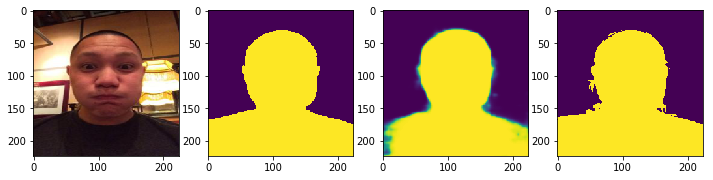

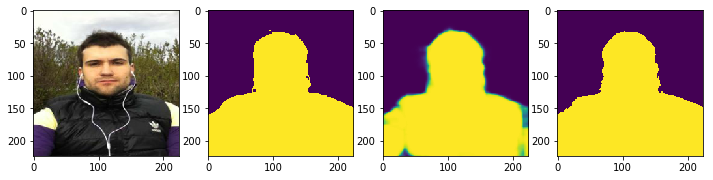

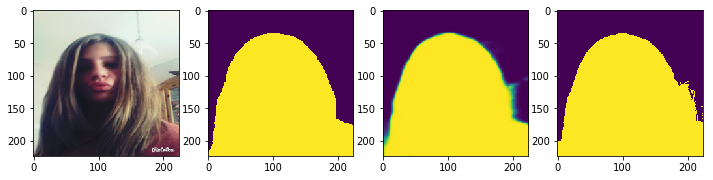

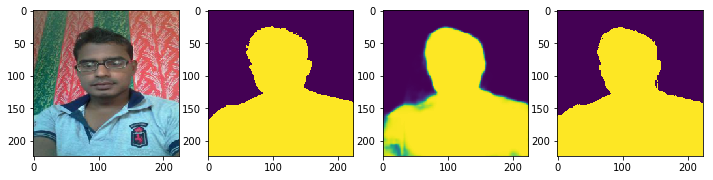

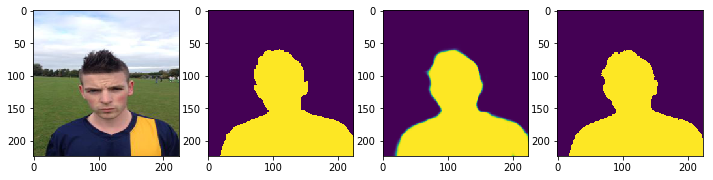

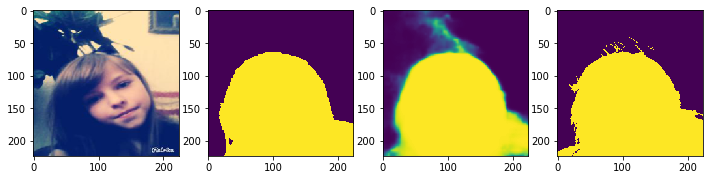

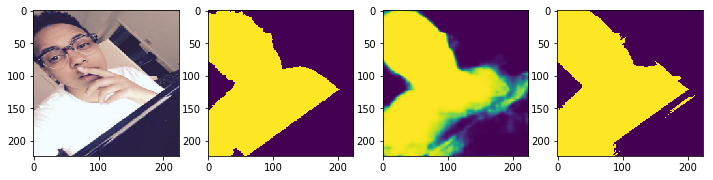

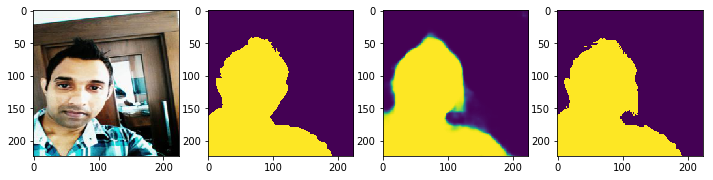

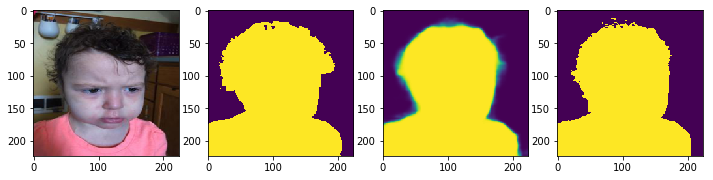

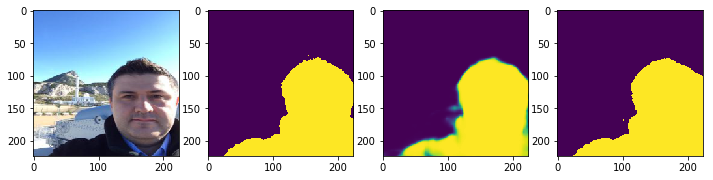

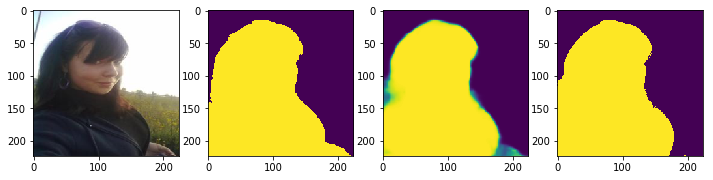

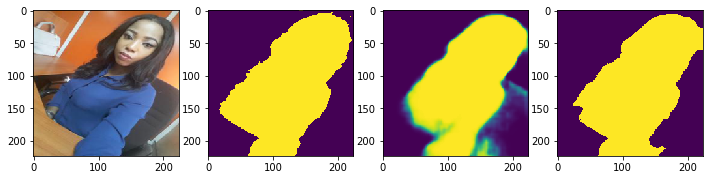

In [15]:
results = []

for idx, (img, mask) in enumerate(test_dataloader):
    img = img[0].permute(1,2,0).numpy().astype(np.uint8)
    mask = mask[0,0]
    
    plt.figure(figsize=(12,3))
    plt.subplot(141)
    plt.imshow(img)
    plt.subplot(142)
    plt.imshow(mask)
    plt.subplot(143)
    plt.imshow(model.get_mask(img, True))
    plt.subplot(144)
    plt.imshow( model.get_mask(img))
    
    plt.show()
    if idx>10:break